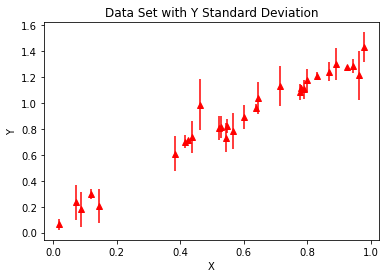

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import minimize

data = np.genfromtxt('data.txt', names=True, dtype=None)
x = data['x']
y = data['y']
y_std = data['y_std']

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Set with Y Standard Deviation')
plt.errorbar(x, y, y_std, color = 'red', linestyle='None', marker='^')

plt.show()

0.060120048402209685 1.6512081616097574 -0.3544471984169096


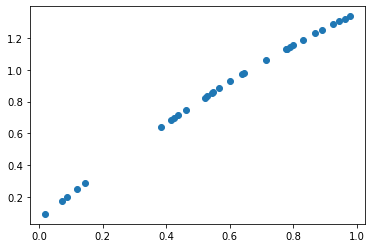

In [23]:
#z = np.polyfit(x,y,2)
#print(p[0],p[1],p[2])
#a=z[0]
#b=z[1]
#c=z[2]
#plt.scatter(x, a*x**2+b*x+c)

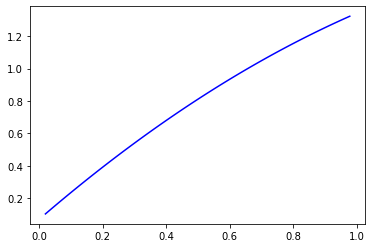

In [6]:
X = np.column_stack((np.ones_like(x), x, x**2))

#inverse variance weights
weights = (1 / y_std)**2

#weighted least squares
A = X.T @ np.diag(weights) @ X
B = X.T @ (weights * y)
params = np.linalg.solve(A, B)

a, b, c = params

x_bestfit = np.linspace(min(x), max(x), 100)
y_bestfit = a + b * x_bestfit + c * x_bestfit**2
plt.plot(x_bestfit, y_bestfit, color='b')


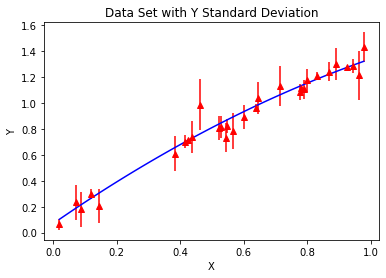

In [7]:
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Set with Y Standard Deviation')
plt.errorbar(data['x'], data['y'], data['y_std'], color = 'red', linestyle='None', marker='^')
plt.plot(x_bestfit, y_bestfit, color='b')
plt.show()